### Questions

### Objectives
* Apply techniques to solve a linear regression problem
* Create multilinear regression models and change them to optimize results

### Outline

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Task, build a model in 35-40 minutes and present it to the class 
Dataset - ```BNG_cholesterol.csv ```

Target - ```chol```

No. Features - ```13```

In [2]:
df = pd.read_csv("./data/BNG_cholesterol.csv")
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,46.950938,1,1,165.981331,0,2,152.691434,0,1.774223,2,0,7,3,265.569780
1,47.359284,1,4,134.748286,0,2,132.079047,1,0.407640,2,0,7,0,269.368061
2,58.455787,1,4,129.456617,0,0,164.523754,1,5.284900,2,0,7,4,244.336917
3,56.070298,1,4,124.831749,0,2,181.453944,0,1.096476,1,1,7,2,237.985356
4,44.121116,1,4,109.887955,0,2,110.055090,1,0.437412,2,0,3,1,245.907334


### Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
age         1000000 non-null float64
sex         1000000 non-null int64
cp          1000000 non-null int64
trestbps    1000000 non-null float64
fbs         1000000 non-null int64
restecg     1000000 non-null int64
thalach     1000000 non-null float64
exang       1000000 non-null int64
oldpeak     1000000 non-null float64
slope       1000000 non-null int64
ca          1000000 non-null int64
thal        1000000 non-null int64
num         1000000 non-null int64
chol        1000000 non-null float64
dtypes: float64(5), int64(9)
memory usage: 106.8 MB


In [4]:
df.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,54.476480,0.684332,3.131843,131.618653,0.153198,0.996614,149.446876,0.340702,1.216292,1.701165,0.684473,4.792311,1.157491,246.734532
std,9.004734,0.464782,0.971611,17.645400,0.360178,0.990117,23.260183,0.473946,1.172394,0.653485,0.940196,1.922950,1.352534,51.736224
min,24.961463,0.000000,1.000000,83.615276,0.000000,0.000000,63.079527,0.000000,-0.530058,1.000000,0.000000,3.000000,0.000000,98.749664
25%,48.309046,0.000000,3.000000,120.330773,0.000000,0.000000,135.577669,0.000000,0.203006,1.000000,0.000000,3.000000,0.000000,213.669965
50%,55.512484,1.000000,3.000000,129.937426,0.000000,1.000000,153.040786,0.000000,0.998942,2.000000,0.000000,3.000000,1.000000,241.036442
75%,60.538989,1.000000,4.000000,139.997132,0.000000,2.000000,165.855131,1.000000,1.776590,2.000000,1.000000,7.000000,2.000000,271.811430
max,80.955026,1.000000,4.000000,211.292502,1.000000,2.000000,206.227856,1.000000,6.832899,3.000000,3.000000,7.000000,4.000000,513.214158


In [5]:
dummies = ["sex", "cp", "fbs", "restecg", "exang", 
           "slope", "ca", "thal", "num"]

In [8]:
df_dum = pd.get_dummies(df, columns=dummies)

In [9]:
df_dum.head()

,age,trestbps,thalach,oldpeak,chol,sex_0,sex_1,cp_1,cp_2,cp_3,...,ca_2,ca_3,thal_3,thal_6,thal_7,num_0,num_1,num_2,num_3,num_4
0,46.950938,165.981331,152.691434,1.774223,265.569780,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,47.359284,134.748286,132.079047,0.407640,269.368061,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,58.455787,129.456617,164.523754,5.284900,244.336917,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,56.070298,124.831749,181.453944,1.096476,237.985356,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,44.121116,109.887955,110.055090,0.437412,245.907334,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
#df_dum.isna().sum()

In [12]:
cont = ["age", "trestbps", "thalach", "oldpeak"]

In [13]:
def normalize(series):
    return (series - series.mean())/series.std()

In [14]:
for col in cont:
    df_dum[col] = normalize(df_dum[col])

In [15]:
df_dum.describe()

,age,trestbps,thalach,oldpeak,chol,sex_0,sex_1,cp_1,cp_2,cp_3,...,ca_2,ca_3,thal_3,thal_6,thal_7,num_0,num_1,num_2,num_3,num_4
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,3.095401e-15,3.373110e-15,2.402437e-15,3.026202e-17,246.734532,0.315668,0.684332,0.082781,0.166440,0.286934,...,0.130857,0.067714,0.530328,0.086377,0.383295,0.471395,0.195439,0.118661,0.133290,0.081215
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,51.736224,0.464782,0.464782,0.275551,0.372475,0.452331,...,0.337244,0.251255,0.499080,0.280920,0.486189,0.499181,0.396538,0.323389,0.339888,0.273165
min,-3.277722e+00,-2.720447e+00,-3.713098e+00,-1.489559e+00,98.749664,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.849102e-01,-6.397067e-01,-5.962639e-01,-8.642883e-01,213.669965,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.150511e-01,-9.527847e-02,1.545091e-01,-1.853900e-01,241.036442,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.732580e-01,4.748251e-01,7.054224e-01,4.779093e-01,271.811430,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.940514e+00,4.515276e+00,2.441124e+00,4.790717e+00,513.214158,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix + Interpretation

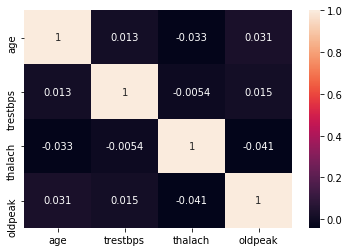

In [19]:
corr = df_dum[cont].corr()
sns.heatmap(corr, annot=True)

No multicollinearity between the continuous variables.

### Baseline Model Using Statsmodels

In [21]:
from statsmodels.formula.api import ols

In [24]:
x_col = list(df_dum.columns.drop(['chol']))
x_col

['age',
 'trestbps',
 'thalach',
 'oldpeak',
 'sex_0',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'cp_4',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_1',
 'slope_2',
 'slope_3',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'thal_3',
 'thal_6',
 'thal_7',
 'num_0',
 'num_1',
 'num_2',
 'num_3',
 'num_4']

In [27]:
outcome = 'chol'

In [28]:
predictors = '+'.join(x_col)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4683.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:38:26   Log-Likelihood:            -5.3118e+06
No. Observations:             1000000   AIC:                         1.062e+07
Df Residuals:                  999975   BIC:                         1.062e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.659e+10   7.47e+10     -0.758      0.448   -2.03e+11    8.97e+10
age            6.6572      0.049    135.399      0.000       6.561       6.754
trestbps       4.3061      0.049     87.727      0.000       4.210       4.402
thalach        0.0782      0.049      1.591      0.112      -0.018       0.175
oldpeak        0.3380      0.054      6.215      0.000       0.231       0.445
sex_0      -1.083e+10   3.53e+10     -0.307      0.759      -8e+10    5.84e+10
sex_1      -1.083e+10   3.53e+10     -0.307      0.759      -8e+10    5.84e+10
cp_1       -8.585e+10   3.05e+11     -0.282      0.778   -6.83e+11    5.12e+11
cp_2       -8.585e+10   3.05e+11     -0.282      0.778   -6.83e+11    5.12e+11
cp_3       -8.585e+10   3.05e+11     -0.282      0.778   -6.83e+11    5.12e+11
cp_4       -8.585e+10   3.05e+11     -0.282      0.778   -6.83e+11    5.12e+11
fbs_0       5.944e+11   1.97e+12      0.301      0.763   -3.27e+12    4.46e+12
fbs_1       5.944e+11   1.97e+12      0.301      0.763   -3.27e+12    4.46e+12
restecg_0   -2.93e+11   1.02e+12     -0.288      0.773   -2.28e+12     1.7e+12
restecg_1   -2.93e+11   1.02e+12     -0.288      0.773   -2.28e+12     1.7e+12
restecg_2   -2.93e+11   1.02e+12     -0.288      0.773   -2.28e+12     1.7e+12
exang_0      2.18e+11   7.01e+11      0.311      0.756   -1.16e+12    1.59e+12
exang_1      2.18e+11   7.01e+11      0.311      0.756   -1.16e+12    1.59e+12
slope_1    -1.664e+11   5.88e+11     -0.283      0.777   -1.32e+12    9.85e+11
slope_2    -1.664e+11   5.88e+11     -0.283      0.777   -1.32e+12    9.85e+11
slope_3    -1.664e+11   5.88e+11     -0.283      0.777   -1.32e+12    9.85e+11
ca_0       -9.567e+10   3.42e+11     -0.280      0.780   -7.66e+11    5.75e+11
ca_1       -9.567e+10   3.42e+11     -0.280      0.780   -7.66e+11    5.75e+11
ca_2       -9.567e+10   3.42e+11     -0.280      0.780   -7.66e+11    5.75e+11
ca_3       -9.567e+10   3.42e+11     -0.280      0.780   -7.66e+11    5.75e+11
thal_3     -1.203e+11   4.32e+11     -0.279      0.781   -9.67e+11    7.26e+11
thal_6     -1.203e+11   4.32e+11     -0.279      0.781   -9.67e+11    7.26e+11
thal_7     -1.203e+11   4.32e+11     -0.279      0.781   -9.67e+11    7.26e+11
num_0       1.628e+10    4.1e+10      0.397      0.691   -6.41e+10    9.66e+10
num_1       1.628e+10    4.1e+10      0.397      0.691   -6.41e+10    9.66e+10
num_2       1.628e+10    4.1e+10      0.397      0.691   -6.41e+10    9.66e+10
num_3       1.628e+10    4.1e+10      0.397      0.691   -6.41e+10    9.66e+10
num_4       1.628e+10    4.1e+10      0.397      0.691   -6.41e+10    9.66e+10
==============================================================================
Omnibus:                    86988.462   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120949.399
Sk

### Baseline Model Using sklearn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
df_dum.head()

,age,trestbps,thalach,oldpeak,chol,sex_0,sex_1,cp_1,cp_2,cp_3,...,ca_2,ca_3,thal_3,thal_6,thal_7,num_0,num_1,num_2,num_3,num_4
0,-0.835732,1.947401,0.139490,0.475890,265.569780,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,-0.790384,0.177363,-0.746676,-0.689744,269.368061,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0.441913,-0.122527,0.648184,3.470342,244.336917,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.176998,-0.384627,1.376045,-0.102198,237.985356,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-1.149991,-1.231522,-1.693529,-0.664350,245.907334,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
x = df_dum.drop(labels='chol', axis=1)
y = df_dum['chol']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Iterate through models

In [39]:
features = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features.append(model.params.index[i])
    
len(features)

3

In [40]:
predictors = '+'.join(features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     9602.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:50:03   Log-Likelihood:            -5.3509e+06
No. Observations:             1000000   AIC:                         1.070e+07
Df Residuals:                  999996   BIC:                         1.070e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.7345      0.051   4837.279      0.000     246.635     246.835
age            7.2416      0.051    141.895      0.000       7.142       7.342
trestbps       4.6550      0.051     91.245      0.000       4.555       4.755
oldpeak       -0.0502      0.051     -0.984      0.325      -0.150       0.050
==============================================================================
Omnibus:                    93658.401   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126929.187
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cross Validate

### Final Model Summary 
- What is your model?
- What transformations/feature engineering/standardization did you do?
- What features are you using and why?
- Interpret your model features using their coefficients
- Recommendations?

### Assessment